/Users/gabrieltishelman/Desktop/current portfolio.csv

In [ ]:
import tkinter as tk
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Predefined sets of securities
predefined_portfolios = {
    "Multifactor": ["VOO", "DFAC", "VB", "SMMV", "AVSC", "VEA", "BIL"],
    "Market": ["VOO", "INTC", "AMD"],
    "Custom Series": ["TSLA", "GM", "F"],
}

# Create the main tkinter window
window = tk.Tk()
window.title("Correlation Heatmap")
window.geometry("600x400")

# Create a label for Portfolio 1
portfolio1_label = tk.Label(window, text="Portfolio 1:")
portfolio1_label.pack()

# Create a text entry for Portfolio 1
portfolio1_entry = tk.Entry(window)
portfolio1_entry.pack()

# Create a label for Portfolio 2
portfolio2_label = tk.Label(window, text="Portfolio 2:")
portfolio2_label.pack()

# Create a text entry for Portfolio 2
portfolio2_entry = tk.Entry(window)
portfolio2_entry.pack()

# Create a button to generate the correlation heatmap
generate_button = tk.Button(window, text="Generate Heatmap")


securities1 = []

while True:
    security1 = input("Enter Portfolio 1 ('done' to finish, 'edit' to delete previous entry, 'cancel' to clear all): ")
    if security1.lower() == 'done':
        break
    elif security1.lower() == 'edit':
        if securities1:
            del securities1[-1]  # Delete the previous entry
            print("Previous entry deleted.")
            print("Current securities in Portfolio 1:", securities1)
        else:
            print("No previous entry to delete.")
    elif security1.lower() == 'cancel':
        securities1.clear()  # Clear all entries
        print("All securities in Portfolio 1 cleared.")
    elif security1 in predefined_portfolios:
        securities1.extend(predefined_portfolios[security1])
    else:
        securities1.append(security1.upper())

securities1 = list(set(securities1))  # Remove duplicate entries

closing_prices1 = {}

for security in securities1:
    ticker = yf.Ticker(security)
    history = ticker.history(period="max")
    closing_prices1[security] = list(history["Close"])

securities2 = []

while True:
    security2 = input("Enter Portfolio 2 ('done' to finish, 'edit' to delete previous entry, 'cancel' to clear all): ")
    if security2.lower() == 'done':
        break
    elif security2.lower() == 'edit':
        if securities2:
            del securities2[-1]  # Delete the previous entry
            print("Previous entry deleted.")
            print("Current securities in Portfolio 2:", securities2)
        else:
            print("No previous entry to delete.")
    elif security2.lower() == 'cancel':
        securities2.clear()  # Clear all entries
        print("All securities in Portfolio 2 cleared.")
    elif security2 in predefined_portfolios:
        securities2.extend(predefined_portfolios[security2])
    else:
        securities2.append(security2.upper())
        
securities2 = list(set(securities2))  # Remove duplicate entries

closing_prices2 = {}

for security in securities2:
    ticker = yf.Ticker(security)
    history = ticker.history(period="max")
    closing_prices2[security] = list(history["Close"])

# Calculate correlations between closing prices of securities from both portfolios
correlations = pd.DataFrame(index=securities1, columns=securities2)

for security1 in securities1:
    for security2 in securities2:
        prices1 = closing_prices1[security1]
        prices2 = closing_prices2[security2]
        
        # Find the common start date
        common_start_date = max(min(history.index), min(ticker.history(start=min(history.index)).index)).strftime("%Y-%m-%d")
        
        # Retrieve historical data using the common start date
        data1_common = yf.download(security1, start=common_start_date, end=datetime.now().strftime("%Y-%m-%d"), progress=False)
        data2_common = yf.download(security2, start=common_start_date, end=datetime.now().strftime("%Y-%m-%d"), progress=False)
        
        # Check if there is any missing data in the common period
        if data1_common.empty or data2_common.empty:
            print(f"Insufficient data available for {security1} and {security2} in the common period.")
            correlations.loc[security1, security2] = None
            continue

        # Extract the "Close" price column
        close1 = data1_common['Close']
        close2 = data2_common['Close']

        # Calculate daily returns
        returns1 = close1.pct_change()
        returns2 = close2.pct_change()

        # Calculate the correlation between the two tickers
        correlation = returns1.corr(returns2)
        correlations.loc[security1, security2] = correlation

# Convert correlation matrix values to floats
correlations = correlations.astype(float)

fig = plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlations, annot=True, fmt=".2f", cmap="Greens_r", cbar=False, annot_kws={"fontsize": 14},
                     linewidth=0.5)
plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.ylabel("Securities from Portfolio 1", fontsize=14, labelpad=20)
plt.xlabel("Securities from Portfolio 2", fontsize=14, labelpad=20)
if len(securities1) > 10 or len(securities2) > 10:
    ax.tick_params(axis='both', labelsize=8)
elif 4 <= len(securities1) <= 10 or 4 <= len(securities2) <= 10:
    ax.tick_params(axis='both', labelsize=10)
else:
    ax.tick_params(axis='both', labelsize=12)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

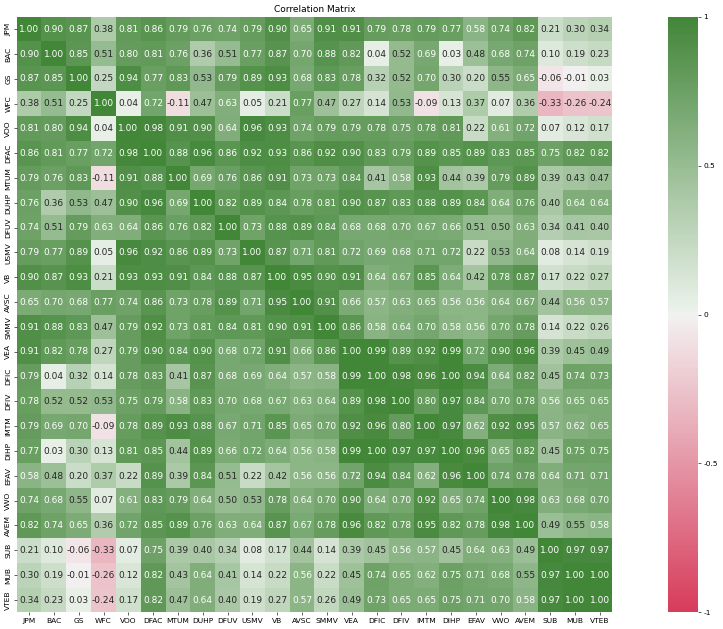

In [1]:
import tkinter as tk
from tkinter import ttk, filedialog
import yfinance as yf
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def retrieve_closing_prices(symbol):
    # Calculate start and end dates
    today = datetime.date.today()
    start_date = today - datetime.timedelta(days=5 * 365)  # 5 years ago

    # Fetch historical data using yfinance
    data = yf.download(symbol, start=start_date, end=today)

    # Extract and return closing prices
    closing_prices = data['Close']
    return closing_prices

# Define the predefined portfolios
predefined_portfolios = {
    "MULTIFACTOR": ["VOO", "DFAC", "MTUM", "DUHP","DFUV","USMV","VB","AVSC","SMMV","VEA","DFIC","DFIV","IMTM",
                   "DIHP","EFAV","VWO","AVEM","SUB","MUB","VTEB"],
    "Finance": ["JPM", "BAC", "GS", "WFC"],
    "Retail": ["WMT", "AMZN", "TGT", "HD"]
}

# Create the first portfolio
portfolio1 = []

# Create the second portfolio
portfolio2 = []

def generate_correlation_matrix():
    # Retrieve closing prices for the securities in the first portfolio
    closing_prices1 = {}
    for ticker in portfolio1:
        closing_prices1[ticker] = retrieve_closing_prices(ticker)

    # Retrieve closing prices for the securities in the second portfolio
    closing_prices2 = {}
    for ticker in portfolio2:
        closing_prices2[ticker] = retrieve_closing_prices(ticker)

    # Combine the closing prices from both portfolios
    combined_closing_prices = {**closing_prices1, **closing_prices2}

    # Create a DataFrame to store the closing prices
    df = pd.DataFrame(combined_closing_prices)

    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Create a new GUI window for displaying the correlation matrix
    correlation_window = tk.Toplevel(root)
    correlation_window.title("Correlation Matrix")

    # Create a Figure and Axes for the correlation matrix plot
    fig, ax = plt.subplots(figsize=(60, 60))

    # Define the color map
    cmap = sns.diverging_palette(5, 125, as_cmap=True)

    # Set the font size for the correlation matrix annotations
    annot_kws = {"fontsize": 12}  # Adjust the font size as desired

    # Plot the correlation matrix as a heatmap with adjusted color scale
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", center=0, square=True, ax=ax, vmin=-1, vmax=1, annot_kws=annot_kws)

    # Adjust the size of the tick labels on the x and y axes
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)  # Adjust the font size as desired
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)  # Adjust the font size as desired

    # Set the colorbar ticks and labels
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
    cbar.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])

    ax.set_title("Correlation Matrix")

    # Create a canvas to display the plot in the GUI window
    canvas = FigureCanvasTkAgg(fig, master=correlation_window)
    canvas.draw()
    canvas.get_tk_widget().pack()
    
    
def add_security_to_portfolio(portfolio, ticker_entry, portfolio_listbox):
    ticker = ticker_entry.get().upper()
    portfolio.append(ticker)
    portfolio_listbox.insert(tk.END, ticker)
    ticker_entry.delete(0, tk.END)

def clear_portfolio(portfolio, portfolio_listbox):
    portfolio.clear()
    portfolio_listbox.delete(0, tk.END)

def remove_security_from_portfolio(portfolio, portfolio_listbox):
    selected_index = portfolio_listbox.curselection()
    if selected_index:
        selected_security = portfolio_listbox.get(selected_index)
        portfolio.remove(selected_security)
        portfolio_listbox.delete(selected_index)

def select_predefined_portfolio(portfolio, predefined_portfolio, portfolio_listbox):
    portfolio.extend(predefined_portfolios[predefined_portfolio])
    for ticker in predefined_portfolios[predefined_portfolio]:
        portfolio_listbox.insert(tk.END, ticker)

def import_csv_file(portfolio, portfolio_listbox):
    file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
    if file_path:
        with open(file_path, 'r') as file:
            csv_data = file.readlines()
            for line in csv_data:
                ticker = line.strip()  # Assuming tickers are in the first column without a header
                portfolio.append(ticker)
                portfolio_listbox.insert(tk.END, ticker)
                
def list_correlated_pairs():
    correlated_pairs = []
    for pair in itertools.combinations(portfolio1 + portfolio2, 2):
        correlation = df[pair[0]].corr(df[pair[1]])
        if correlation > 0.9:
            correlated_pairs.append(pair)

    if correlated_pairs:
        for pair in correlated_pairs:
            print(f"{pair[0]} - {pair[1]}")
    else:
        print("No correlated pairs found.")
        
def create_gui():
    global root

    root = tk.Tk()
    root.title("Portfolio Correlation Matrix")

    # Create frame for the first portfolio
    portfolio1_frame = tk.LabelFrame(root, text="First Portfolio")
    portfolio1_frame.pack(side=tk.LEFT, padx=10, pady=10)

    # Create predefined portfolio selection for the first portfolio
    predefined_portfolio1_label = tk.Label(portfolio1_frame, text="Select Predefined Portfolio:")
    predefined_portfolio1_label.pack(pady=10)

    predefined_portfolio1_combobox = ttk.Combobox(portfolio1_frame, values=list(predefined_portfolios.keys()))
    predefined_portfolio1_combobox.pack()

    predefined_portfolio1_button = tk.Button(portfolio1_frame, text="Add Predefined Portfolio", command=lambda: select_predefined_portfolio(portfolio1, predefined_portfolio1_combobox.get(), portfolio1_listbox))
    predefined_portfolio1_button.pack(pady=5)

    # Create ticker entry and button for adding securities to the first portfolio
    ticker1_entry = tk.Entry(portfolio1_frame, width=10)
    ticker1_entry.pack(side=tk.LEFT, padx=5, pady=5)
    add_security1_button = tk.Button(portfolio1_frame, text="Add Security", command=lambda: add_security_to_portfolio(portfolio1, ticker1_entry, portfolio1_listbox))
    add_security1_button.pack(side=tk.LEFT, padx=5, pady=5)

    # Create listbox to display securities in the first portfolio
    portfolio1_listbox = tk.Listbox(portfolio1_frame, height=5)
    portfolio1_listbox.pack(pady=5)

    # Create frame for the second portfolio
    portfolio2_frame = tk.LabelFrame(root, text="Second Portfolio")
    portfolio2_frame.pack(side=tk.LEFT, padx=10, pady=10)

    # Create predefined portfolio selection for the second portfolio
    predefined_portfolio2_label = tk.Label(portfolio2_frame, text="Select Predefined Portfolio:")
    predefined_portfolio2_label.pack(pady=5)

    predefined_portfolio2_combobox = ttk.Combobox(portfolio2_frame, values=list(predefined_portfolios.keys()))
    predefined_portfolio2_combobox.pack()

    predefined_portfolio2_button = tk.Button(portfolio2_frame, text="Add Predefined Portfolio", command=lambda: select_predefined_portfolio(portfolio2, predefined_portfolio2_combobox.get(), portfolio2_listbox))
    predefined_portfolio2_button.pack(pady=5)

    # Create ticker entry and button for adding securities to the second portfolio
    ticker2_entry = tk.Entry(portfolio2_frame, width=10)
    ticker2_entry.pack(side=tk.LEFT, padx=5, pady=5)
    add_security2_button = tk.Button(portfolio2_frame, text="Add Security", command=lambda: add_security_to_portfolio(portfolio2, ticker2_entry, portfolio2_listbox))
    add_security2_button.pack(side=tk.LEFT, padx=5, pady=5)

    # Create listbox to display securities in the second portfolio
    portfolio2_listbox = tk.Listbox(portfolio2_frame, height=5)
    portfolio2_listbox.pack(pady=5)

    # Create buttons to clear portfolios
    clear_portfolio1_button = tk.Button(root, text="Clear First Portfolio", command=lambda: clear_portfolio(portfolio1, portfolio1_listbox))
    clear_portfolio1_button.pack(pady=5)

    clear_portfolio2_button = tk.Button(root, text="Clear Second Portfolio", command=lambda: clear_portfolio(portfolio2, portfolio2_listbox))
    clear_portfolio2_button.pack(pady=5)

    # Create button to import securities from a CSV file for the second portfolio
    import_csv_button = tk.Button(root, text="Import CSV for Second Portfolio", command=lambda: import_csv_file(portfolio2, portfolio2_listbox))
    import_csv_button.pack(pady=5)

    # Create button to generate correlation matrix
    generate_button = tk.Button(root, text="Generate Correlation Matrix", command=generate_correlation_matrix)
    generate_button.pack(pady=10)

    # Create button to remove selected security from the first portfolio
    remove_security1_button = tk.Button(root, text="Remove Selected Security from First Portfolio", command=lambda: remove_security_from_portfolio(portfolio1, portfolio1_listbox))
    remove_security1_button.pack(pady=5)

    # Create button to remove selected security from the second portfolio
    remove_security2_button = tk.Button(root, text="Remove Selected Security from Second Portfolio", command=lambda: remove_security_from_portfolio(portfolio2, portfolio2_listbox))
    remove_security2_button.pack(pady=5)
    


    root.mainloop()

if __name__ == "__main__":
    create_gui()
